# 10장. 회귀분석 (1) 주택가격 회귀 분석

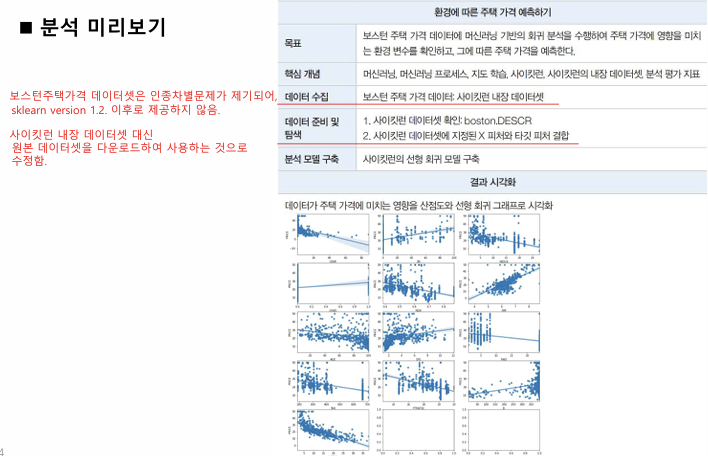
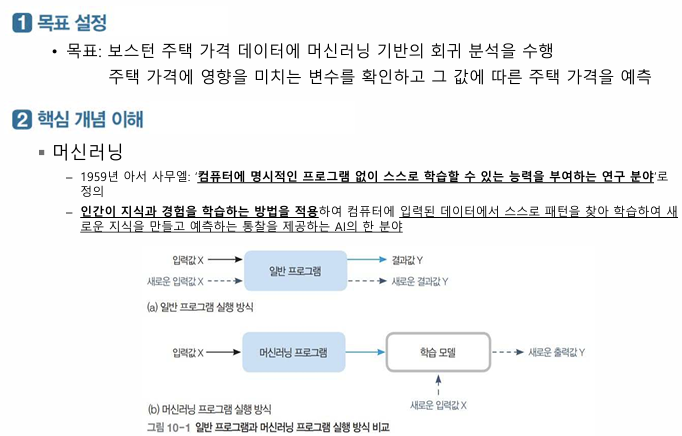
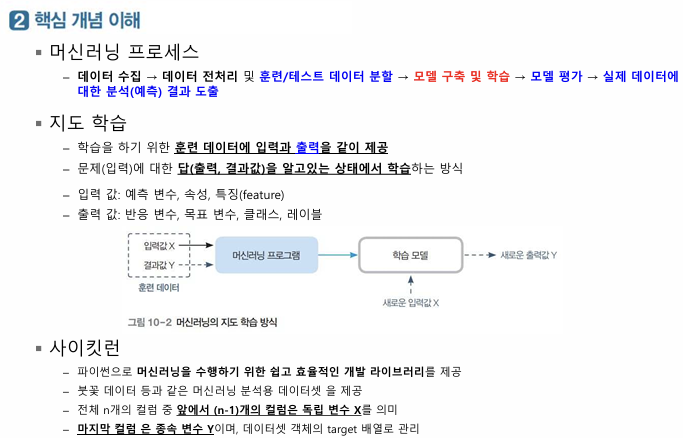
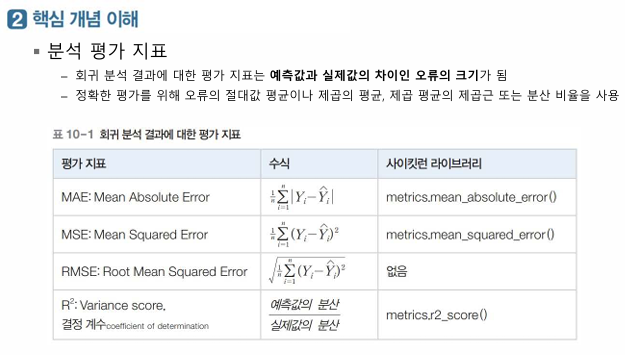

In [1]:
# 향후 버전 업에 대한 경고 메시지 출력 안하기 
import warnings

warnings.filterwarnings(action='ignore') 

### - 머신러닝 패키지 sklearn 설치

In [2]:
!pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

## 1) 데이터 수집

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000 
    - PTRATIO  pupil-teacher ratio by town
    - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - LSTAT    % lower status of the population
    - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.

## ** 보스턴주택가격 데이터셋은 인종차별문제가 제기되어, sklearn version 1.2. 이후로 제공하지 않음. **
### - from sklearn.datasets import load_boston 대신에 원본데이터셋을 다운로드 받아서 사용하는 것으로 수정함.

In [4]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"

# sep="\s+" : 공백 문자(공백, 탭 등)를 구분자로 사용하겠다.
# skiprow=22 : 데이터 파일의 첫 22줄을 건너뛰겠다
# header=None : 데이터 파일에 열 이름이 없다는 것
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# raw_df.values[::2, :] : 데이터의 짝수 행을 선택하고, 전체 열을 선택
# raw_df.values[1::2, :2] : 홀수 행에서 처음 두 개의 열을 선택
# np.hstack() : 두 배열을 수평으로 합침. 행은 동일하게 유지하고 열을 이어 붙임
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# data 배열의 형상을 출력
# X 피처 => 주택 관련 변수들
print(data.shape)

# 타깃 피처 => 주택가격
print(target.shape)

(506, 13)
(506,)


## 2) 데이터 준비 및 탐색

In [5]:
# 데이터셋의 독립변수 X(주택 관련 변수들)의 이름을 리스트로 저장
feature_names = ['CRIM', 'ZN', 'INDUS','CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [ ]:
'''
독립 변수 x ?
: 독립변수는 다른 변수에 의해 영향을 받지 않으며, 종종 입력 변수, 설명 변수 또는 예측 변수라고도 한다.
: 독립 변수는 모델이 종속 변수의 변화를 설명하거나 예측할 수 있게 해준다.

종속 변수 y ?
: 종속 변수는 독립 변수의 변화에 따라 변화하는 값으로, 예측하고자 하는 대상이다.
: 목표 변수, 반응 변수라고도 함
: 종속 변수는 독립 변수에 의해 영향을 받으며, 회귀 모델에서 주로 예측되는 값이다.
'''

'''
독립 변수 X : 주택 관련 변수들
종속 변수 y : 주택 가격
'''

In [ ]:
'''
* 회귀 모델 ?
: 독립 변수(입력 변수)와 종속 변수(목표 변수) 사이의 관계를 수학적으로 표현한 모델
회귀 모델의 목적은 주어진 독립 변수를 사용해 종속 변수를 예측하거나 설명하는 것
이를 통해 데이터의 패턴을 찾고, 새로운 데이터에 대한 예측을 수행할 수 있다.


* 회귀 모델의 종류
1. 선형 회귀(Linear Regression)
: 가장 단순한 회귀 모델로, 독립 변수와 종속 변수 사이의 관계가 직선으로 표현되는 모델

2. 다항 회귀(Polynomial Regression)
: 종속 변수가 이진 분류(0 또는 1과 같은 두가지 결과)인 경우 사용됨
: 선형 회귀와 달리, X의 제곱, 세제곱 등 고차항을 포함함

3. 로지스틱 회귀(Logistic Regression)
: 종속 변수가 이진 분류(0 또는 1과 같은 두가지 결과)인 경우 사용
: 예를 들어, 특정 조건에서 집값이 상승할 가능성을 예측할 때 사용

4. 릿지 회귀(Ridge Regression) 및 라쏘 회귀(Lasso Regression)
: 다중 공선성 문제(독립 변수들이 상관관계가 높을 때 발생하는 문제)를 해결하기 위한 정규화 회귀 모델
: 계수값을 조정하여 과적합을 방지함


* 회귀 모델의 목적
1. 예측 : 주어진 독립 변수들을 통해 종속 변수의 값을 예측
2. 관계 해석 : 독립 변수가 종속 변수에 미치는 영향을 분석하고 어떤 변수가 중요한지를 파악
'''

In [8]:
# 데이터셋 객체의 data 배열 data,즉 독립 변수 X가 되는 피처들을 DataFrame자료형으로 변환하여
# boston_df를 생성. boston_df의 데이터 5개를 확인 bostone_df.head( )
boston_df = pd.DataFrame(data, columns = feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
# 데이터셋 객체의 target 배열 target, 즉 종속 변수 Y인 주택 가격(‘PRICE’) 컬럼을 boston_df에 추가
# boston_df의 데이터 5개를 확인 bostone_df.head( )
boston_df['PRICE'] = target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
'''
데이터셋의 형태 boston_df.shape, 즉 행의 개수(데이터 개수)와 열의 개수(변수 개수) 확인.
-행의 개수가 506이므로 데이터가 506개있으며, 열의 개수가 14이므로 변수가 14개 있음
-변수 중에서 13개는 독립변수 X가 되고, 마지막 변수 ‘PRICE’는 종속변수 Y가 됨
'''
print('보스톤 주택 가격 데이터셋 크기 : ', boston_df.shape)

보스톤 주택 가격 데이터셋 크기 :  (506, 14)


In [12]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


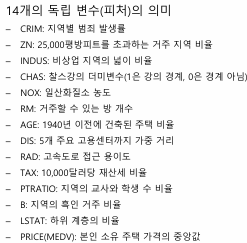

## 3) 분석 모델 구축

사이킷런의 선형 분석 모델 패키지 sklearn.linear_model에서 
선형 회귀LinearRegression를 이용하여 분석 모델을 구축

In [13]:
'''
사이킷런을 사용하여 머신러닝 회귀분석을하기위한LinearRegression과 데이터셋 분리 작업을 위한
train_test_split, 성능 측정을 위한 평가 지표인 mean_squared_ error, r2_score를 임포트
'''
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
#  PRICE 피처를 회귀식의 종속 변수 Y로 설정하고 PRICE를 제외 drop( )한 나머지 피처를 독립 변수 X로 설정
# X, Y 분할하기
Y = boston_df['PRICE']
X = boston_df.drop(['PRICE'], axis=1, inplace=False)

In [15]:
#  X와 Y 데이터 506개를 학습 데이터와 평가 데이터로 7:3 비율로 분할test_size=0.3
# 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=156)

In [16]:
# 선형회귀분석 : 모델 생성
lr = LinearRegression()

In [17]:
# 선형회귀분석 : 모델 훈련
lr.fit(X_train, Y_train)

LinearRegression()

In [19]:
# 선형회귀분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)

Y_predict

array([23.15424087, 19.65590246, 36.42005168, 19.96705124, 32.40150641,
       17.66341192, 30.32844101, 17.8513932 , 10.86187069, 12.83177966,
       21.18350434, 16.41212257, 28.66817527, 37.01110952, 23.42172197,
       24.56906089, 14.55434775, 11.51023436, 30.27784089, 23.48027467,
       22.86210577, 17.61623753, 21.2528808 , 17.29802868, 34.06118291,
        7.19879841, 13.39928425, 19.4234468 , 13.2423286 ,  8.3336837 ,
       29.34933073, 11.83768837, 19.84125562, 23.97623235, 16.34351261,
       13.20973749, 14.3352014 , 17.26323753, 17.37091562, 23.84644351,
       32.8390912 ,  9.3866759 , 19.06694335, -3.98840206, 19.87721947,
       21.26003361, 24.17775745, 35.35923599, 20.32415303, 28.23212889,
       32.67560962, 40.83910565, 41.19126206, 19.78588457, 25.0134137 ,
       24.13111046, 19.62715719, 33.49344219, 23.61402811, 15.31513017,
       22.70657074, 25.78436589, 23.99723589,  8.78013424, 21.81929237,
       39.68193998, 32.8907251 , 30.20417723, 14.35610647, 23.56

## 4) 결과 분석 및 시각화

선형 회귀 분석 모델을 평가지표를 통해 평가하고, 회귀계수를 확인하여 피처의 영향 분석

In [20]:
'''
회귀 분석은 지도 학습이므로 평가 데이터X에 대한 결과값YY_test를 이미 알고 있는 상태에서
평가데이터 YY_test와 In [13]에서 구한 예측 결과 Y_predict의 오차를 계산하여 모델을 평가. 
평가지표MSE를 구하고 mean_squared_error( ), 제곱근을 계산하여np.sqrt(mse) 평가 지표 RMSE를 구함.
그리고 평가지표R2을 구함 r2_score( )
'''
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 17.297, RMSE : 4.159
R^2(Variance score) : 0.757


In [21]:
print('Y 절편 값: ', lr.intercept_)
print('회귀 계수 값: ', np.round(lr.coef_, 1))

Y 절편 값:  40.99559517216419
회귀 계수 값:  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [22]:
'''
회귀모델에서 구한 회귀계수값lr.coef_과 피처이름X.columns을 묶어서 Series 자료형으로 만들고, 
회귀계수값을 기준으로 내림차순ascending=False으로 정렬sort_ values( )하여 확인
'''
coef = pd.Series(data = np.round(lr.coef_, 2), index=X.columns)
coef.sort_values(ascending = False)

RM          3.35
CHAS        3.05
RAD         0.36
ZN          0.07
INDUS       0.03
AGE         0.01
B           0.01
TAX        -0.01
CRIM       -0.11
LSTAT      -0.57
PTRATIO    -0.92
DIS        -1.74
NOX       -19.80
dtype: float64

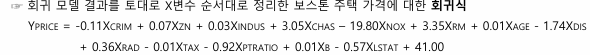

## - 회귀 분석 결과를 산점도 + 선형 회귀 그래프로 시각화하기

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

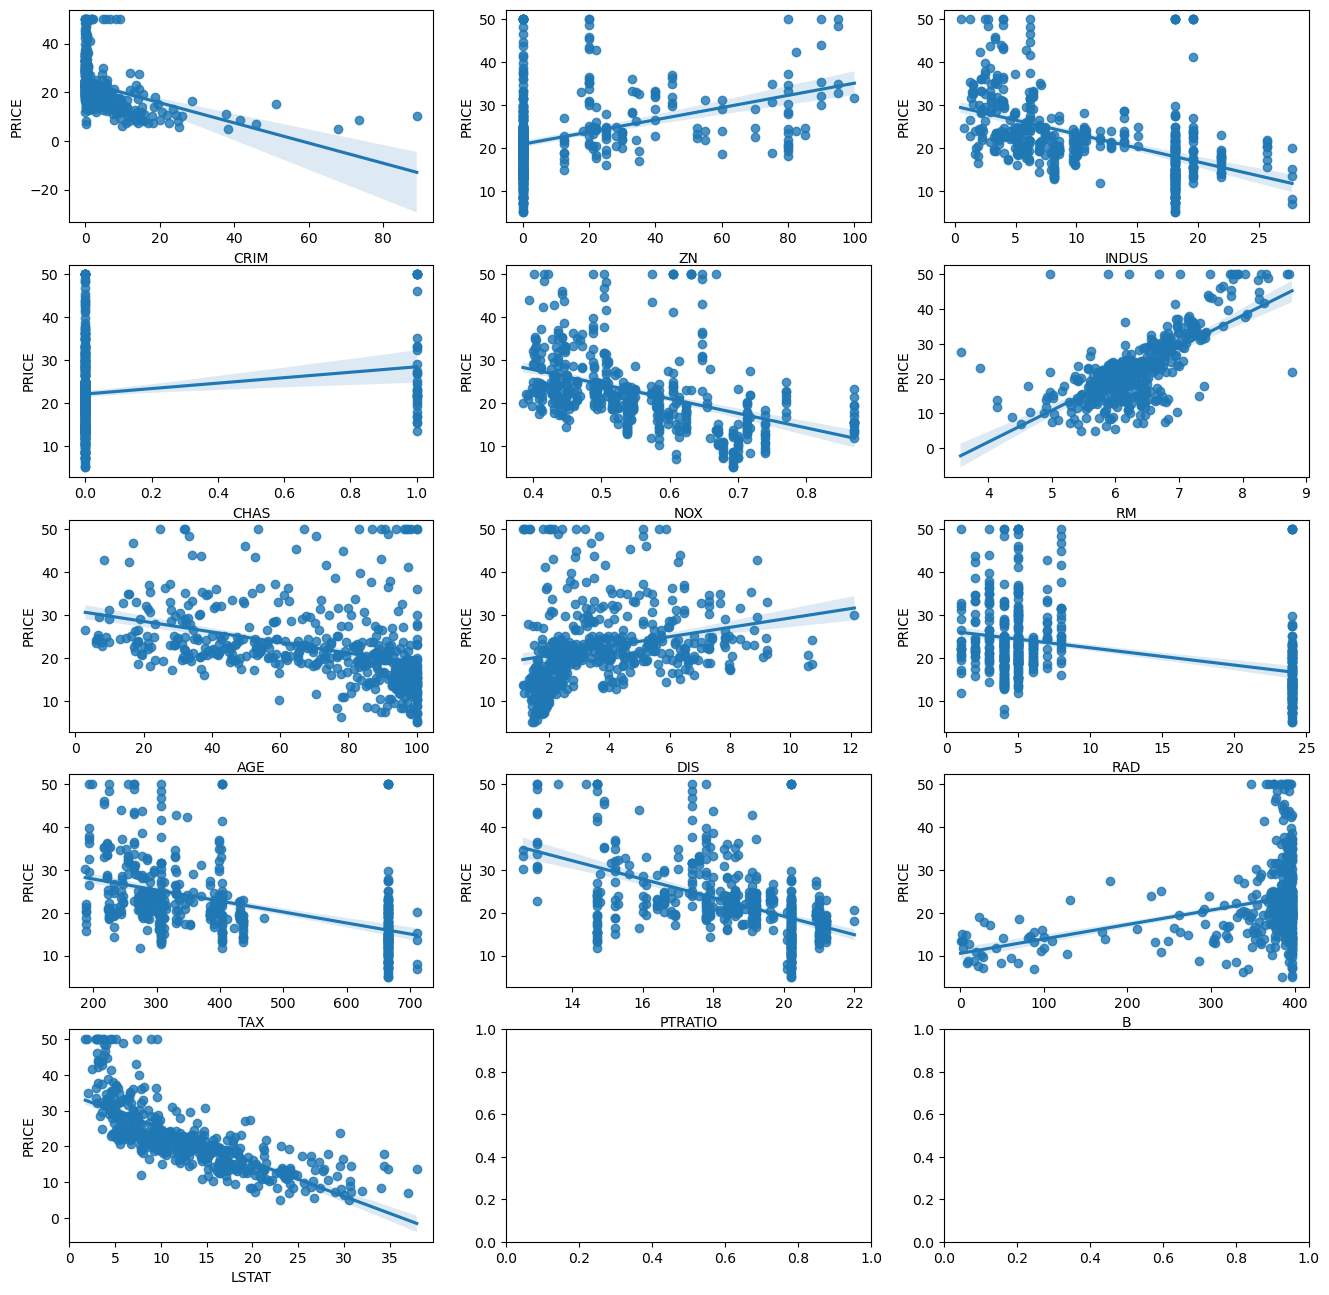

In [24]:
'''
독립 변수인 13개 피처와 종속 변수인 주택가격, PRICE와의 회귀 관계를 보여주는 13개 그래프를
subplots()를 사용하여 5행 3열 구조로 모아서 나타냄. 
regplot()은 산점도 그래프와 선형 회귀 그래프를 함께 그려줌
'''
fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=5)

x_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


for i, feature in enumerate(x_features):
      row = int(i/3)
      col = i%3
      sns.regplot(x=feature, y='PRICE', data=boston_df, ax=axs[row][col])

In [25]:
'''
주요 변수들과의 관계 분석:
1. CRIM (범죄율):
부정적 상관관계가 있습니다. 범죄율이 높을수록 주택 가격이 낮아지는 경향이 있습니다. 
이는 범죄율이 주택 가격에 부정적인 영향을 미친다는 것을 의미합니다.

2. ZN (25,000 평방피트 이상의 주거지 비율):
약한 양의 상관관계가 있습니다. 
고급 주거 지역 비율이 높을수록 주택 가격이 상승하는 경향이 있음을 알 수 있습니다.

3. INDUS (비소매업 비율):
약한 부정적 상관관계가 있습니다. 
상업적인 지역(비소매업 비율)이 많을수록 주택 가격이 낮아지는 경향이 보입니다.

4. CHAS (찰스강 인근 여부):
약한 양의 상관관계가 있습니다. 
강 인근에 위치한 주택일수록 가격이 약간 더 높은 경향이 있지만, 큰 차이는 없어 보입니다.

5. NOX (일산화질소 농도):
약한 부정적 상관관계가 있습니다. 
공기 오염도가 높을수록 주택 가격이 약간 하락하는 경향이 있습니다.

6. RM (방 개수):
강한 양의 상관관계가 있습니다. 
방의 개수가 많을수록 주택 가격이 상승하는 경향이 뚜렷합니다. 
이는 예상 가능한 결과로, 더 큰 집이 일반적으로 더 높은 가격을 가집니다.

7. AGE (오래된 주택 비율):
약한 부정적 상관관계가 보입니다. 
오래된 주택의 비율이 높을수록 주택 가격이 약간 하락하는 경향이 있지만, 상관관계는 강하지 않습니다.

8. DIS (고용 센터와의 거리):
양의 상관관계가 있습니다. 도심에서 멀리 떨어진 지역일수록 주택 가격이 상승하는 경향이 있습니다. 
이는 교외 지역일수록 주택 가격이 더 비쌀 가능성을 시사합니다.

9. RAD (고속도로 접근성):
약한 양의 상관관계가 있습니다. 고속도로 접근성이 높을수록 주택 가격이 약간 상승하는 경향이 보입니다.

10. TAX (재산세율):
부정적 상관관계가 있습니다. 재산세율이 높을수록 주택 가격이 낮아지는 경향이 보입니다.

11. PTRATIO (학생-교사 비율):
이 변수는 그래프가 비어 있어 명확한 경향을 파악하기 어렵습니다. 
보통 학생-교사 비율이 낮을수록, 즉 교육의 질이 높을수록 주택 가격이 상승하는 경향이 있습니다.

12. B (흑인 비율):
양의 상관관계가 있습니다. 변수의 의미를 해석할 때 주의가 필요하지만, 
흑인 비율이 높을수록 주택 가격이 높아지는 경향이 있음을 시사합니다.

13. LSTAT (저소득층 비율):
강한 부정적 상관관계가 있습니다. 저소득층 비율이 높을수록 주택 가격이 뚜렷하게 낮아지는 경향이 보입니다.

결론:
이 그래프들은 주택 가격이 다양한 요인들에 의해 어떻게 영향을 받는지 잘 보여줍니다.
**RM (방 개수)**와 **LSTAT (저소득층 비율)**은 주택 가격에 가장 강한 영향을 미치는 변수들입니다.
범죄율(CRIM), 재산세율(TAX), 공기 오염(NOX)도 주택 가격에 부정적인 영향을 미치며, 
이와 같은 요인은 주택 구매 시 중요한 고려 사항이 될 수 있습니다.
교육 수준(PTRATIO)과 고속도로 접근성(RAD)은 주택 가격과 양의 상관관계를 보여 
주택의 위치와 교육 환경도 중요한 요소임을 시사합니다.
이 분석을 통해 주택 가격을 예측하는 데 있어 중요한 요인들을 파악할 수 있습니다.
'''

'\n주요 변수들과의 관계 분석:\n1. CRIM (범죄율):\n부정적 상관관계가 있습니다. 범죄율이 높을수록 주택 가격이 낮아지는 경향이 있습니다. \n이는 범죄율이 주택 가격에 부정적인 영향을 미친다는 것을 의미합니다.\n\n2. ZN (25,000 평방피트 이상의 주거지 비율):\n약한 양의 상관관계가 있습니다. \n고급 주거 지역 비율이 높을수록 주택 가격이 상승하는 경향이 있음을 알 수 있습니다.\n\n3. INDUS (비소매업 비율):\n약한 부정적 상관관계가 있습니다. \n상업적인 지역(비소매업 비율)이 많을수록 주택 가격이 낮아지는 경향이 보입니다.\n\n4. CHAS (찰스강 인근 여부):\n약한 양의 상관관계가 있습니다. \n강 인근에 위치한 주택일수록 가격이 약간 더 높은 경향이 있지만, 큰 차이는 없어 보입니다.\n\n5. NOX (일산화질소 농도):\n약한 부정적 상관관계가 있습니다. \n공기 오염도가 높을수록 주택 가격이 약간 하락하는 경향이 있습니다.\n\n6. RM (방 개수):\n강한 양의 상관관계가 있습니다. \n방의 개수가 많을수록 주택 가격이 상승하는 경향이 뚜렷합니다. \n이는 예상 가능한 결과로, 더 큰 집이 일반적으로 더 높은 가격을 가집니다.\n\n7. AGE (오래된 주택 비율):\n약한 부정적 상관관계가 보입니다. \n오래된 주택의 비율이 높을수록 주택 가격이 약간 하락하는 경향이 있지만, 상관관계는 강하지 않습니다.\n\n8. DIS (고용 센터와의 거리):\n양의 상관관계가 있습니다. 도심에서 멀리 떨어진 지역일수록 주택 가격이 상승하는 경향이 있습니다. \n이는 교외 지역일수록 주택 가격이 더 비쌀 가능성을 시사합니다.\n\n9. RAD (고속도로 접근성):\n약한 양의 상관관계가 있습니다. 고속도로 접근성이 높을수록 주택 가격이 약간 상승하는 경향이 보입니다.\n\n10. TAX (재산세율):\n부정적 상관관계가 있습니다. 재산세율이 높을수록 주택 가격이 낮아지는 경향이 보입니다.\n\n11. PTRATIO